# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 80.5 out of a total of 115.0, or 70.0%</font></div>

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [29]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

<div align="right"><font color="blue" size="4">6.0/10.0</font></div>

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')
news_raw.info()
news_raw.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


(2129, 521)

<div align="right"><font color="blue" size="4">3.0</font></div>

(2) The dataset has 2129 rows and 521 columns. The datatype of each column is integer of size 64 bits each (8 bytes). The size of the dataset is 8.5 Mega Bytes. Out of the 521 columns in the dataset there are 520 attributes and the last column is the class label named 'class'.Each of the 2129 rows represent a document belonging to a particular class.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

<div align="right"><font color="blue" size="4">2.0/6.0</font></div>

In [3]:
news_raw.head(5)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


<div align="right"><font color="blue" size="4">2.0</font></div>

(2) Each row represents a document belonging to a class. The class of each document is determined by the value in the class column. In each row the values under the columns (other than the class column) represent, 1 + the frequency count of each word in that document. (It is, 1 + the frequency count, because it is mentioned in the Data Description of the assignment that: 1 was added to all the word counts)

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

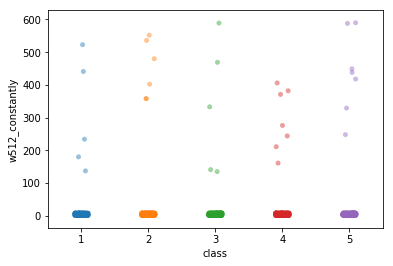

In [4]:
ax = sns.stripplot(x = 'class',y = 'w512_constantly',data = news_raw, jitter = True, alpha = 0.45)
ax

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) From the scatter plot it is observed that the attribute 'w512_constantly' in all the classes {1,2,3,4,5}, takes very small values, but there there are some data points in each class, where it takes very high values (outliers in the data set)

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

<div align="right"><font color="blue" size="4">5.0/8.0</font></div>

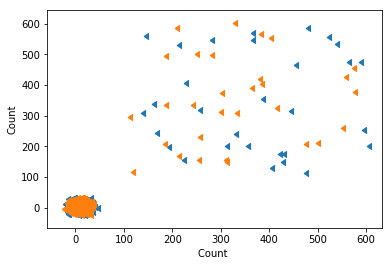

In [16]:
scatter_jitter(news_raw['w512_constantly'].values,news_raw['w513_generate'].values) # default jitter is set to 0.2
scatter_jitter(news_raw['w514_definite'].values,news_raw['w515_lacks'].values)
plt.xlabel('Count ')
plt.ylabel('Count')
plt.show()

<div align="right"><font color="blue" size="4">3.0</font></div>

(2) These plots demonstrate an increase in the possibility of the data-set containing outliers, because most of the values of the attributes are very small, however there are some values which are very large. These seem like the outliers in the data set.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

<div align="right"><font color="blue" size="4">10.0/15.0</font></div>

(1) Criterion: Find the mean of each attribute and its corresponding standard deviation. Consider each of the attributes in the data set seperately. If the value of an attribute is greater than that particular attribute's 'mean+standard deviation' for a given data point, then remove the data point from the data set.

Reasonable criterion because: While trying to fit a Gaussian Naive Bayes Model to the data, most of the values are expected to be centered around the mean. By adding one standard deviation to the mean we limit the amount by which the attribute value can vary from the mean, for a given data point.

<div align="right"><font color="blue" size="4">3.0</font></div>

Number of points in the cleaned dataset:  2083
Number of points rejected as outliers:  46


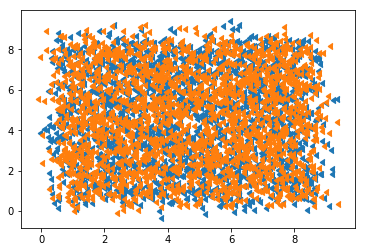

In [17]:
news_clean = news_raw.copy(deep=True)
number_points_raw_dataset = news_raw.shape[0]
attribute_names = list(news_clean.columns.values)
# removing 'class' from attribute names 
attribute_names = attribute_names[:len(attribute_names)-1]
# Building the threshold for each_attribute ie: Mean + Standard Deviation
description_of_news_raw = news_raw.describe()
threshold = dict()
for attribute in attribute_names:
    threshold[attribute] = description_of_news_raw[attribute]['mean'] + description_of_news_raw[attribute]['std']
# Cleaning the data set accrording to the criterion
for attribute in attribute_names:
     news_clean = news_clean[news_clean[attribute] < threshold[attribute]]
number_points_clean_dataset = news_clean.shape[0]       
print('Number of points in the cleaned dataset: ', number_points_clean_dataset)
print('Number of points rejected as outliers: ', (number_points_raw_dataset-number_points_clean_dataset))

# Replotting using scatter jitter after removing outliers as per the threshold
scatter_jitter(news_clean['w512_constantly'].values,news_clean['w513_generate'].values) # default jitter is set to 0.2
scatter_jitter(news_clean['w514_definite'].values,news_clean['w515_lacks'].values)


<div align="right"><font color="blue" size="4">5.0</font></div>

(3) The number of data points in the cleaned dataset are 2083. The number of data points rejected as outliers are 46 data points. It is reasonable to eliminate these 46 data points from the data set as these data points are very far away from the mean of the distribution when considering the attributes.

<div align="right"><font color="blue" size="4">2.0</font></div>

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

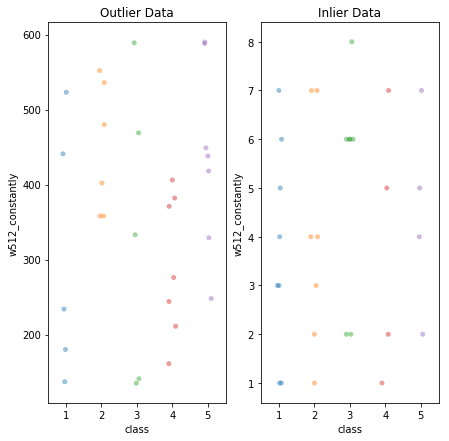

In [18]:


lst = list(news_raw['w512_constantly'] >=  threshold['w512_constantly'])
lst_outlier_docs = []
for i in range(len(lst)):
    if (lst[i]==True):
        lst_outlier_docs.append(i)

news_outlier = news_raw[news_raw['w512_constantly'] >= threshold['w512_constantly']] 
news_inlier = news_raw[news_raw['w512_constantly'] < threshold['w512_constantly']]
news_inlier = news_inlier.head(len(news_outlier))

fig = plt.subplots(1,2,figsize=(7,7), sharex=False, sharey=True)



plt.subplot(1,2,1)
plt.title('Outlier Data')
sns.stripplot(x = 'class',y = 'w512_constantly',data = news_outlier, jitter = True, alpha = 0.45)




plt.subplot(1,2,2)
plt.title('Inlier Data')
sns.stripplot(x = 'class',y = 'w512_constantly',data = news_inlier, jitter = True, alpha = 0.45)



<div align="right"><font color="blue" size="4">4.0</font></div>

(2)  a) On plotting the outlier data and inlier data, stripplots side by side it can be seen that the outlier values are far away from the real data points by an order of magnitude of around 100. The vast difference is not a regular pattern for any one single class but for all the classes. For the attribute under consideration 'w512_constantly' classes 1 & 3 have five outliers, classes 2 & 5 have six outliers and class 4 has seven outliers.

b) The cleaning should be performed on not only the training set but also on the entire data-set (including the test set) to ensure consistency in the data value ranges across training set and test set.

<div align="right"><font color="blue" size="4">4.0</font></div>

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

<div align="right"><font color="blue" size="4">4.0/6.0</font></div>

In [24]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path, delimiter = ',')
print('Training data info: ')
news_train.info()
print('\nNumber of rows and columns in the news_train data set are: ',news_train.shape[0],news_train.shape[1],'\n')

data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path, delimiter = ',')
print('Test data info: ')
news_test.info()
print('\nNumber of rows and columns in the news_test data set are: ',news_test.shape[0],news_test.shape[1],'\n')

Training data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB

Number of rows and columns in the news_train data set are:  2099 521 

Test data info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB

Number of rows and columns in the news_test data set are:  128 521 



<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

1. Assumption behind Naive Bayes Model: the probability of an input feature give the class label is independent of the the other input features given the class label, in the dataset. The equation for Naive Baye's Assumption is P(xi | x1...xi-1 , y) = P(xi,y)


2. Without the Naive Baye's assumption the probability of a feature given the class will depend on, the previous features encountered in the training set given that class. We will have to estimate the p(xi | x1..xi-1,y). To estimate such probabilities we would require an extremely large data set. To build such a data set is not practical.


<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

<div align="right"><font color="blue" size="4">5.0/8.0</font></div>

Text(0,0.5,'w273_tek')

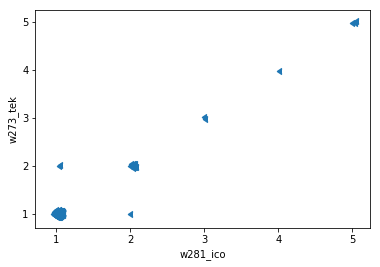

In [42]:
# plt.figure(figsize=(10,7))
scatter_jitter(news_train['w281_ico'].values,news_train['w273_tek'].values,jitter=0.1) # default jitter is set to 0.2
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')

<div align="right"><font color="blue" size="4">3.0</font></div>

(2) As the count of 'w281_ico' increases in one document then so does 'w273_tek' in the same document. It can hence be concluded that the words 'w281_ico' and 'w273_tek' have a positive correlation. Yes there is an impact on the Naive Bayes assumption for this data set. The Naive Bayes assumption is that, the features are conditionally independent, however from the graph generated above it can be seen that the features 'w281_ico' and 'w273_tek' are positively correlated. Hence implying that the occurence of one word(w281_ico) does indeed affect the occurence of the other word(w273_tek) and vice versa, in the document. These features are hence correlated and not independent.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

<div align="right"><font color="blue" size="4">4.5/7.0</font></div>

(1) The simplest classifier would be that classifier which selects a prediction of the class label according to the class distribution in the data set. Mathematically this means that, the probability of a class being selected is directly propotional to the frequency of the class occurence, within the dataset.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Describe dummy classifer in simple words. Eg, The simplest classifier consits always predicting the class with the most observations. </font></div>

In [59]:
dummy_classifier = DummyClassifier(strategy="stratified")
X_train = news_train.drop('class', axis=1, inplace=False)
Y_train = news_train['class']
dummy_classifier.fit(X_train,Y_train)
accuracy_baseline_dummy = dummy_classifier.score(X_train,Y_train) # test sample, true label
print('The classification accuracy is: ',accuracy_baseline_dummy)

The classification accuracy is:  0.19723677941877085


<div align="right"><font color="blue" size="4">3.5</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

<div align="right"><font color="blue" size="4">10.0/12.0</font></div>

In [47]:
X_train = news_train.drop('class', axis=1, inplace=False)
Y_train = news_train['class']
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None)

<div align="right"><font color="blue" size="4">3.0</font></div>

The classification accuracy is :  0.8780371605526441


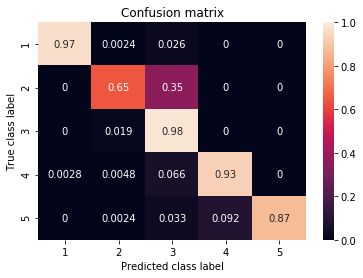

In [64]:
accuracy = gnb.score(X_train,Y_train) # test sample, true label
print('The classification accuracy is : ',accuracy)

cm = confusion_matrix (Y_train,gnb.predict(X_train)) #confusion_matrix(y_true,y_pred)
ncm = cm / cm.sum(axis=1) # Normalized confusion matrix

def plot_confusion_matrix(CM, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(CM, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(CM, vmin=0., vmax=1., annot=True)
    plt.title(title)
    plt.ylabel('True class label')
    plt.xlabel('Predicted class label')
    
plt.figure()
plot_confusion_matrix(ncm,classes=['1','2','3','4','5'])

# pd.value_counts(Y_train)

<div align="right"><font color="blue" size="4">4.0</font></div>

(3) The model has an accuracy of 0.8780371605526441, whereas the baseline accuracy on the training data with the stratified strategy is just 0.19723677941877085. Hence the model has a reasonably good performance. 

Yes, accuracy is a reasonable metric to use for this dataset because the classes are mostly balanced (ranging from 363 data points in class 1 to 447 data points in class 4) for the training data set.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

<div align="right"><font color="blue" size="4">1.0/3.0</font></div>

Given the high accuracy of the model (0.88) it is expected that the values along the diagonals would be very high, as compared to the values in the non-diagonals. Yes, while the matrix is as expected, one particular non-diagonal cell (2,3) has shown a slightly larger propotion of misclassification as compared to the other non diagonal cells.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

<div align="right"><font color="blue" size="4">7.0/12.0</font></div>

The classification accuracy on the test data set is :  0.8203125


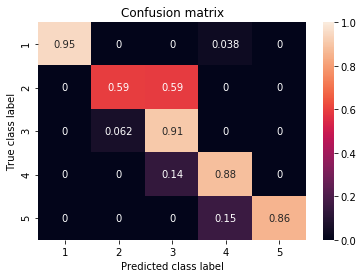

In [65]:
X_Test = news_test.drop('class', axis=1, inplace=False)
Y_Test = news_test['class']
accuracy_test = gnb.score(X_Test,Y_Test)
print('The classification accuracy on the test data set is : ',accuracy_test)
cm_test = confusion_matrix (Y_Test,gnb.predict(X_Test)) #confusion_matrix(y_true,y_pred)
ncm_test = cm_test / cm_test.sum(axis=1) # Normalized confusion matrix
plot_confusion_matrix(ncm_test,classes=['1','2','3','4','5'])

<div align="right"><font color="blue" size="4">4.0</font></div>

In [66]:
accuracy_baseline_test = dummy_classifier.score(X_Test,Y_Test) # test sample, true label
print('The baseline classification accuracy on the test data set is: ',accuracy_baseline_test)

The baseline classification accuracy on the test data set is:  0.1796875


<div align="right"><font color="blue" size="4">2.0</font></div>

(3) On the training data the Gaussian Naive Bayes Model has an accuracy of 0.8780371605526441. On the test data, however there is a drop in the accuracy of the model to 0.8203125. On the training data the baseline classification accuracy is 0.19723677941877085 whereas on the test data the baseline performance is 0.1796875. In both cases (considering classification accuracy either on test data or training data) it can be concluded that the accuracy of the model is far greater than the baseline accuracy and the accuracy of the model, on training dataset and test dataset is close.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

<div align="right"><font color="blue" size="4">7.0/7.0</font></div>

Accuracy of the gaussian Naive Bayes classifier with outliers:  0.171875


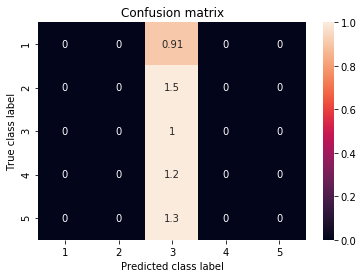

In [69]:
gnb = GaussianNB()
X_Raw = news_raw.drop('class', axis=1, inplace=False)
Y_Raw = news_raw['class']
gnb.fit(X_Raw,Y_Raw)
accuracy_gnb_with_outliers = gnb.score(X_Test,Y_Test) # test sample, true label
print('Accuracy of the gaussian Naive Bayes classifier with outliers: ',accuracy_gnb_with_outliers)
cm_raw = confusion_matrix (Y_Test,gnb.predict(X_Test)) #confusion_matrix(y_true,y_pred)
ncm_raw = cm_raw / cm_raw.sum(axis=1) # Normalized confusion matrix
plot_confusion_matrix(ncm_raw,classes=['1','2','3','4','5'])  

<div align="right"><font color="blue" size="4">5.0</font></div>

(2) The accuracy of the Gaussina Naive Bayes classifier without cleaning is extremely low. Cleaning affects the classifier because the P(Xi|Y) has two important parameters in its estimation, which are the Mean(mu) and Standard Deviation(sigma). These get changed drastically beacuse of the presence of the outliers in the dataset, causing the accuracy of the classifier to drop.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

Fitting a Gaussian Naive Bayes classifier to the given data set is not ideally suited because the data points take up discrete integer values (the count of the words in the document) and not real values over a continuous range or interval. For data where the integer represents the feature counts, Multinomial Naive Bayes is suited for the classification task.

<div align="right"><font color="blue" size="4">3.0</font></div>